In [1]:
import pandas as pd
import numpy as np

import pickle as pkl
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

In [2]:
with open("AgesAndHeights.pkl", "rb") as f:
    object = pkl.load(f)
df = pd.DataFrame(object)
df.to_csv(r'AgeANDHeight.csv')


In [3]:
df

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [4]:
pdf=df.iloc[:,0]
pdf

0     14.767874
1      3.107671
2      7.266917
3      1.815180
4     16.753758
        ...    
95     7.323712
96     5.591509
97     2.625606
98     5.519293
99    13.117413
Name: Age, Length: 100, dtype: float64

In [5]:
df.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


In [6]:
df.isnull().sum()

Age       0
Height    0
dtype: int64

In [7]:
df.head()

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414


In [8]:
def TKPY_fill_null_multi(df):
  #df.isnull().sum()
  for column in df.columns:
      df[column] = df[column].fillna(df[column].mean())

In [9]:
a=TKPY_fill_null_multi(df)

In [10]:
df.isnull().sum()

Age       0
Height    0
dtype: int64

for i in arr:
    print(arr[i])
#     if arr[i]==False:
#         mean_value=arr[i].mean()
#         arr[i]=arr[i].fillna(value=mean_value, inplace=True)

In [11]:
pf=ProfileReport(df,progress_bar=False)

In [12]:
pf.to_widgets()

In [13]:
pf.to_file('AgesAndHeightsAnalysis.html')

In [14]:
x=pd.DataFrame(df['Age'])
y=pd.DataFrame(df['Height'])

In [15]:
x

,Age
0,14.767874
1,3.107671
2,7.266917
3,1.815180
4,16.753758
...,...
95,7.323712
96,5.591509
97,2.625606
98,5.519293


In [16]:
y

,Height
0,59.627484
1,36.146453
2,46.912878
3,29.125660
4,68.170414
...,...
95,46.857505
96,39.339990
97,32.918925
98,40.704154


#### height= m* age +c (y=mx+c)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=1000)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
reg = regressor.fit(x_train,y_train)

In [18]:
reg

LinearRegression()

## from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x,y)

In [19]:
reg.coef_

array([[1.95800862]])

In [20]:
reg.intercept_

array([30.46767864])

#### model is height= age * 1.9855967 +30.13813668 

In [21]:
file='liner_reg.sav'
pkl.dump(reg,open(file,'wb'))


In [22]:
y_pred=reg.predict(x_test)
print(y_pred)

[[60.50132671]
 [63.27168055]
 [60.16707839]
 [49.00946963]
 [51.72102479]
 [41.94000498]
 [50.8435418 ]
 [44.23116711]
 [42.20344577]
 [44.78032211]
 [49.8649891 ]
 [41.41590218]
 [37.79787369]
 [48.06068725]
 [36.09210765]
 [33.73398592]
 [45.72031451]
 [33.48755324]
 [33.28330092]
 [30.18104248]
 [41.16236607]
 [40.65483541]
 [31.93995448]
 [35.4001049 ]
 [33.99129877]
 [59.92322992]
 [64.42565907]
 [45.74273623]
 [50.65878289]
 [52.71461675]
 [34.02181612]
 [50.12346051]
 [54.40365167]
 [47.41564302]]


In [23]:
print(x_test.shape)
print(y.shape)

(34, 1)
(100, 1)


In [24]:
print(y_pred)

[[60.50132671]
 [63.27168055]
 [60.16707839]
 [49.00946963]
 [51.72102479]
 [41.94000498]
 [50.8435418 ]
 [44.23116711]
 [42.20344577]
 [44.78032211]
 [49.8649891 ]
 [41.41590218]
 [37.79787369]
 [48.06068725]
 [36.09210765]
 [33.73398592]
 [45.72031451]
 [33.48755324]
 [33.28330092]
 [30.18104248]
 [41.16236607]
 [40.65483541]
 [31.93995448]
 [35.4001049 ]
 [33.99129877]
 [59.92322992]
 [64.42565907]
 [45.74273623]
 [50.65878289]
 [52.71461675]
 [34.02181612]
 [50.12346051]
 [54.40365167]
 [47.41564302]]


Text(0, 0.5, 'Age')

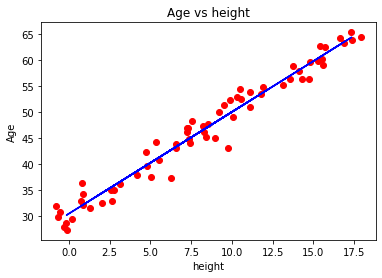

In [25]:
%matplotlib inline
plt.scatter(x_train,y_train,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.title("Age vs height")
plt.xlabel("height")
plt.ylabel("Age")


In [26]:
x

,Age
0,14.767874
1,3.107671
2,7.266917
3,1.815180
4,16.753758
...,...
95,7.323712
96,5.591509
97,2.625606
98,5.519293


 ###### trying manually 

In [27]:
h=  45 * 1.9855967 + 30.13813668 

In [28]:
h

119.48998818000001

In [29]:
l=[23,67,55]
for i in l:
    print(reg.predict([[i]]))

[[75.50187697]]
[[161.65425637]]
[[138.1581529]]


In [30]:
# To call the model saved in file directly 
s=pkl.load(open(file,'rb'))


In [31]:
s.predict([[18]])

array([[65.71183385]])

In [32]:
# Accuracy 
reg.score(x,y)

0.9592057001341745